<a href="https://colab.research.google.com/github/davsan06/kebabchart/blob/main/KebabSpyderChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radarchart con un dataset de kebabs

Este es un notebook en lenguaje R para obtener figuras tipo radarchart o spiderchar para realizar comparaciones rápidas de observaciones, en este caso de un conjunto de valoraciones de kebabs. De forma esquemática:
* Generar el conjunto de datos.
* Establecer el formato de entrada de los datos requeridos para las funcion para graficar.
* Graficar y personalizar la figura.

In [71]:
# Instalamos el paquete necesario para generar las figuras
# ya que no es un paquete por defecto
install.packages("fmsb")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Cargamos la libreria para poder acceder a sus funciones
library(fmsb)

## 1. Generacion de los datos

In [7]:
# Definimos el nombre de las variables que consideramos en nuestro analisis, seran las
# columnas de nuestra tabla
columns <- c('CARNE','SALSA','VARIEDAD DE LA CARTA', 'TURQUEDAD', 'PRECIO')

In [19]:
# Necesitamos que cada una de las observaciones o filas este indexado mediante
# el nombre del restaurante, esto sera util cuando generemos la leyenda de las figuras.
rows <- c('SUMER','SABOR FACTORY','ALADDIN','ANTALIA','EL SULTAN','KEBAB HOUSE','MUMBAY')

In [20]:
# Introducimos a mano todos los datos :(
data_matrix <- matrix(c('SUMER', 2, 3, 5, 5, 3, 
                        'SABOR FACTORY', 2, 4, 3, 2, 3,
                        'ALADDIN', 5, 3, 4, 3, 3,
                        'ANTALIA', 1, 1, 2, 1, 3,
                        'EL SULTAN', 1, 1, 5, 5, 3,
                        'KEBAB HOUSE', 5, 5, 1, 1, 3,
                        'MUMBAY', 2, 2, 3, 1, 5), nrow=7, ncol=6, byrow=TRUE)

## 2. Formato de los datos

La funcion de la libreria "fmsb" que vamos a utilizar necesita que los datos entre como data frame. Un data frame se puede entender como una tabla de datos o matrix que nos permite acceder a estos datos de diversas formas, ya sea por el indice numerico del elemento, el nombre de la columna o de la fila, nos permite ordenar y operar en columnas, ...

In [21]:
# Generamos una tabla con los datos que hemos ido recogiendo en forma de data frame
# esto sera muy util para poder acceder a partir del indice de la fila y/o del nombre
# de la columna
# data <- as.data.frame(data_matrix[,c(2,3,4,5,6)], ncol=4)
data <- as.data.frame(apply(data_matrix[,c(2,3,4,5,6)], 2, function(x) as.numeric(as.character(x))), ncol=5)

In [23]:
# Definimos el nombre de las columnas y de las filas
colnames(data) <- columns
rownames(data) <- rows

In [24]:
# Definimos como primeras filas los valores maximos y minimos de nuestras valoraciones
# En el caso de valoraciones de kebabs, las variables pueden tomar valores entre 1 y 5.
data <- rbind(rep(5,5) , rep(1,5) , data)

In [26]:
# Así es como se ve nuestro conjunto de datos con el formato necesario
data

,CARNE,SALSA,VARIEDAD DE LA CARTA,TURQUEDAD,PRECIO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5,5,5,5,5
2,1,1,1,1,1
SUMER,2,3,5,5,3
SABOR FACTORY,2,4,3,2,3
ALADDIN,5,3,4,3,3
ANTALIA,1,1,2,1,3
EL SULTAN,1,1,5,5,3
KEBAB HOUSE,5,5,1,1,3
MUMBAY,2,2,3,1,5


In [35]:
# Definimos unos colores aleatorios para graficar, los tres primeros elementos del color
# indican la composición en el esquema RGB y el cuarto parametro indica el nivel de transparencia.
colors_border=c( rgb(0.2,0.5,0.5,0.9), rgb(0.8,0.2,0.5,0.9) , rgb(0.7,0.5,0.1,0.9), rgb(0.5,0.5,0.1,0.9), rgb(0.5,0.9,0.1,0.9), rgb(0.2,0.2,0.2,0.9), rgb(0.2,0.7,0.2,0.9)  )
colors_in=c( rgb(0.2,0.5,0.5,0.4), rgb(0.8,0.2,0.5,0.4) , rgb(0.7,0.5,0.1,0.4), rgb(0.5,0.5,0.1,0.4), rgb(0.5,0.9,0.1,0.4), rgb(0.2,0.2,0.2,0.4), rgb(0.2,0.7,0.2,0.4) )

Dividimos nuestros datos de restaurantes en dos graficas distintas para mayor claridad.

In [77]:
# Iniciamos la figura donde guardaremos
png(file="radarchart_kebab_1.png",
width=500, height=500)
# Generamos la figura
radarchart(data[c(1,2,3,4,5,6),], axistype = 1,
           #custom polygon
           pcol=colors_border , pfcol=colors_in , plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(1,5,1), cglwd=0.8,
           #custom labels
           vlcex=0.8 )
# Introducimos una leyenda que nos indique el restaurante
legend(x=0.4, y=1.35, legend = rownames(data[c(3,4,5,6),]), bty = "n", pch=20, text.col = "black", cex=1.2, pt.cex=3, col=colors_in)
# Guardamos la figura 
dev.off()

png 
  2

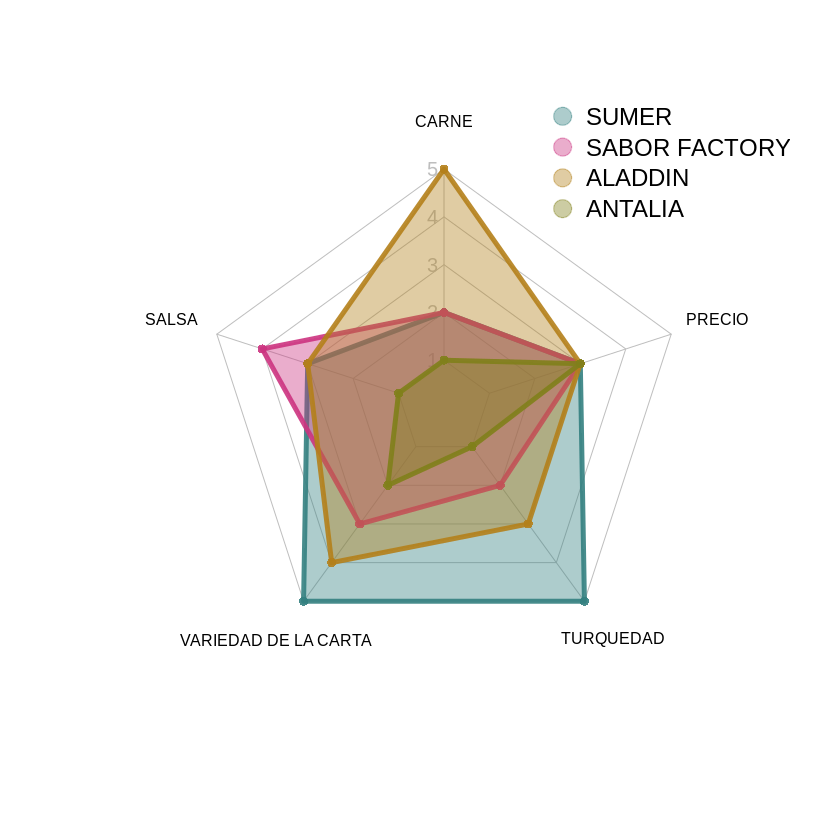

In [79]:
# Generamos la figura
radarchart(data[c(1,2,3,4,5,6),], axistype = 1,
           #custom polygon
           pcol=colors_border , pfcol=colors_in , plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(1,5,1), cglwd=0.8,
           #custom labels
           vlcex=0.8 )
# Introducimos una leyenda que nos indique el restaurante
legend(x=0.4, y=1.35, legend = rownames(data[c(3,4,5,6),]), bty = "n", pch=20, text.col = "black", cex=1.2, pt.cex=3, col=colors_in)

In [78]:
# Iniciamos la figura donde guardaremos
png(file="radarchart_kebab_2.png",
width=500, height=500)
# Generamos la figura
radarchart(data[c(1,2,7,8,9),], axistype = 1,
           #custom polygon
           pcol=colors_border , pfcol=colors_in , plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(1,5,1), cglwd=0.8,
           #custom labels
           vlcex=0.8 )
# Introducimos una leyenda que nos indique el restaurante
legend(x=0.4, y=1.35, legend = rownames(data[c(7,8,9),]), bty = "n", pch=20, text.col = "black", cex=1.2, pt.cex=3, col=colors_in)
# Guardamos la figura 
dev.off()

png 
  2

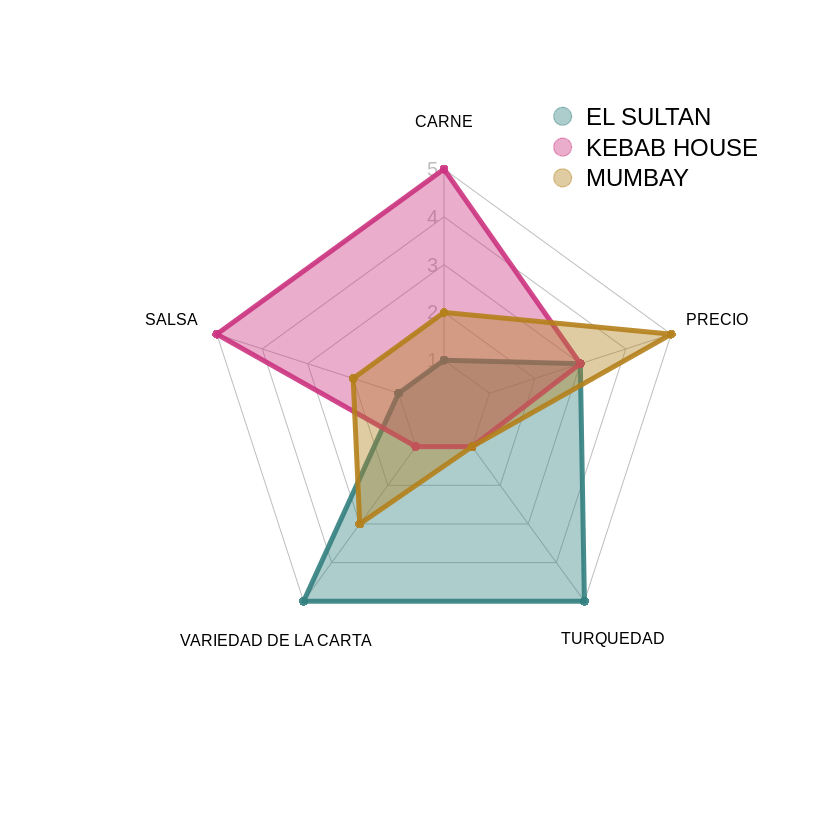

In [80]:
# Generamos la figura
radarchart(data[c(1,2,7,8,9),], axistype = 1,
           #custom polygon
           pcol=colors_border , pfcol=colors_in , plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels=seq(1,5,1), cglwd=0.8,
           #custom labels
           vlcex=0.8 )
# Introducimos una leyenda que nos indique el restaurante
legend(x=0.4, y=1.35, legend = rownames(data[c(7,8,9),]), bty = "n", pch=20, text.col = "black", cex=1.2, pt.cex=3, col=colors_in)